<a href="https://colab.research.google.com/github/Roterdamjr/Mestrado/blob/main/Markowitz_Otimizando_Portf%C3%B3lios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biblioteca

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 28 16:05:59 2024

@author: adaptado de Julia Pocciotti
"""

# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Coletar os dados
import yfinance as yf

In [ ]:
def generate_wallets(df_close, num_portfolios = 10000, risk_free = 0):
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples
    r = df.pct_change()
    mean_returns = r.mean() * 252

    # matriz de covariância
    covariance = np.cov(r[1:].T)

    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(df.columns))
        w = k / sum (k)

        # retorno
        R = np.dot(mean_returns, w)

        # risco
        vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (R - risk_free)/vol

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets


def best_portfolio(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    returns = wallets['returns']

    if method == 'sharpe_ratio':
        indice = np.array(sharpe).argmax()

    elif method == 'volatility':
        indice = np.array(vol).argmin()

    elif method == 'return':
        indice = np.array(returns).argmax()

    return weights[indice], returns[indice], vol[indice]

def plot_efficient_frontier(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    if method == 'sharpe_ratio':
        indice = np.array(sharpe).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'volatility':
        indice = np.array(vol).argmin()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'return':
        indice = np.array(returns).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("oxVolatility")
    plt.ylabel("Expected return")
    plt.show()

# Execução

In [ ]:
# Montando o nossa carteira com preços de fechamento da Amazon, Google, Microsoft e Netflix
df = pd.DataFrame()
tickers = ['AMZN', 'GOOG', 'MSFT', 'NFLX']
#tickers = ['PRIO3.SA','JHSF3.SA','ODPV3.SA','ITSA4.SA', 'EGIE3.SA' ,'LREN3.SA' ,'FLRY3.SA' ,'TRIS3.SA','SBFG3.SA',           'BBAS3.SA' ,'VALE3.SA' ,'ALOS3.SA','KLBN4.SA','CSAN3.SA','IVVB11.SA']

df = yf.download(tickers,  "2023-01-01", "2023-12-31")['Close']

/tmp/ipython-input-5-3489413415.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers,  "2023-01-01", "2023-12-31")['Close']
[*********************100%***********************]  4 of 4 completed


Calcula melhor portfolio

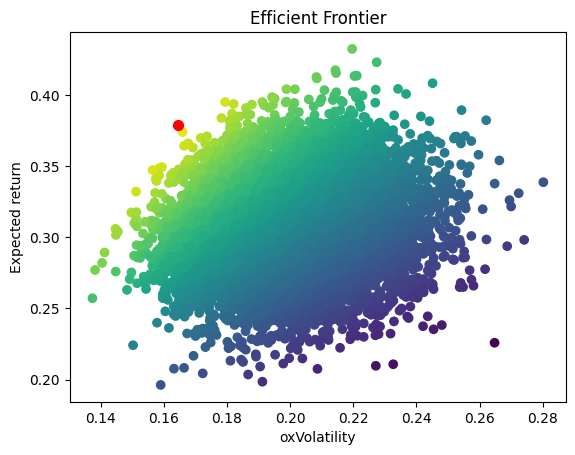

In [ ]:
wallets = generate_wallets(df)
weights, returns, vol = best_portfolio(wallets, method = 'sharpe_ratio')
plot_efficient_frontier(wallets, method = 'sharpe_ratio')

In [ ]:
print ("Retorno: ", round(returns,2))
print ("Volatilidade: ", round(vol,2))

Retorno:  0.38
Volatilidade:  0.16


In [ ]:
df = pd.DataFrame({'Ticker': tickers, 'Peso': weights})
df['Peso'] = (df['Peso'] * 100).astype(int)
print(df)

       Ticker  Peso
0    PRIO3.SA    11
1    JHSF3.SA    11
2    ODPV3.SA     2
3    ITSA4.SA    11
4    EGIE3.SA    13
5    LREN3.SA     2
6    FLRY3.SA     5
7    TRIS3.SA     0
8    SBFG3.SA    13
9    BBAS3.SA     0
10   VALE3.SA     6
11   ALOS3.SA    12
12   KLBN4.SA     0
13   CSAN3.SA     8
14  IVVB11.SA     0


Testa melhor portfolio com os pesos obtidos

In [ ]:
w = np.array([0.25536233, 0.12209638, 0.43166411, 0.19087717]) # ---> pesos obtidos

r = df.pct_change() #retornos do ativo
R = np.dot(r, w) #retorno do portfólio

# média dos retornos anualizados
mean_returns = r.mean() * 252

# matriz de covariância
covariance = np.cov(r[1:].T)

# Risco do portfólio anualizado
vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

# retorno
R = np.dot(mean_returns, w)


print("retorno: ", round(R,2))
print("Risco: ", round(vol,2))

retorno:  0.55
Risco:  0.24
